In [1]:
import numpy as np
from scipy.optimize import fmin_cg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = np.insert(2 * np.random.rand(10, 1), 0, 1, axis=1)
outputs = 4 + (3*features[:, 1]) + np.random.randn(1, 10)

t0 = np.array([0, 0])

In [3]:
features, outputs, t0

(array([[1.        , 1.63132055],
        [1.        , 0.05980552],
        [1.        , 0.08511773],
        [1.        , 1.75454833],
        [1.        , 0.8365055 ],
        [1.        , 0.14514167],
        [1.        , 0.9118404 ],
        [1.        , 1.38050945],
        [1.        , 0.59859653],
        [1.        , 0.65992485]]),
 array([[8.91292495, 4.59107498, 5.8212809 , 9.51279394, 4.86933985,
         2.09124199, 6.67899932, 9.75404673, 6.5038982 , 6.32561535]]),
 array([0, 0]))

In [4]:
def cost_func(theta):
    return (((theta.T @ features.T) - outputs)**2)[0].sum()

def gradient(theta):
    #return (2 * ((theta.T @ features.T) - outputs))[0]
    theta = theta.reshape((2, 1))

    return (((features @ theta) - outputs.T).T @ features).T.reshape((2,))

def h(theta, x1):
    return theta.T @ x1.T

In [5]:
t = fmin_cg(cost_func, x0=t0, fprime=gradient)
t

Optimization terminated successfully.
         Current function value: 13.710229
         Iterations: 17
         Function evaluations: 87
         Gradient evaluations: 87


array([3.84807139, 3.29647444])

In [6]:
cost_func(t0)

475.0470849541935

In [7]:
gradient(t0)

array([-65.0612162 , -64.00069289])

In [8]:
h(t, features[0])
h(t, np.array([1, 1.9]))

10.111372829087578

(0.059805520109693866, 1.7545483339255559)

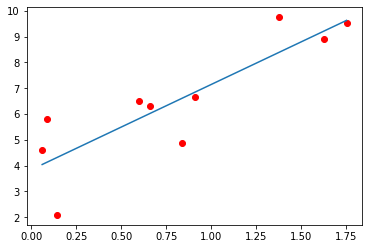

In [9]:
x = features[:, 1]
pmin = x.min()
pmax = x.max()
plt.plot(x, outputs[0], 'ro')
plt.plot([pmin, pmax], [h(t, np.array([1, pmin])), h(t, np.array([1, pmax]))])
pmin, pmax

In [10]:
h(t, features)

array([9.2256779 , 4.04521876, 4.12865979, 9.63189513, 6.60559039,
       4.32652721, 6.85392997, 8.39888551, 5.82132953, 6.02349678])